In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
import seaborn as sns
from itertools import product

In [140]:
def euclidean_distance(vector1, vector2):
    """
    Calculate the Euclidean distance between two vectors.

    Parameters:
    vector1 (numpy array or list): The first vector.
    vector2 (numpy array or list): The second vector.

    Returns:
    float: The Euclidean distance between the two vectors.
    """
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)

    if vector1.shape != vector2.shape:
        raise ValueError("Vectors must have the same length")

    return np.linalg.norm(vector1 - vector2)

In [141]:
def manhattan_distance(vector1, vector2):
    """
    Calculate the Manhattan distance between two vectors.

    Parameters:
    vector1 (numpy array or list): The first vector.
    vector2 (numpy array or list): The second vector.

    Returns:
    float: The Manhattan distance between the two vectors.
    """
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)

    if vector1.shape != vector2.shape:
        raise ValueError("Vectors must have the same length")

    return np.sum(np.abs(vector1 - vector2))

In [142]:
def accuracy_and_generalization_error(true_labels, predicted_labels):
    """
    Calculate accuracy and generalization error between two vectors of labels.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_labels (numpy array or list): The predicted labels.

    Returns:
    tuple: (accuracy, generalization_error)
    """
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    if true_labels.shape != predicted_labels.shape:
        raise ValueError("Vectors must have the same length")

    correct_predictions = np.sum(true_labels == predicted_labels)
    total_predictions = len(true_labels)

    accuracy = correct_predictions / total_predictions
    generalization_error = 1 - accuracy

    return accuracy, generalization_error

In [143]:
def precision(true_labels, predicted_labels):
    """
    Calculate precision.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_labels (numpy array or list): The predicted labels.

    Returns:
    float: Precision score.
    """
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))

    return true_positives / (true_positives + false_positives + 1e-10)  # Add small epsilon to avoid division by zero

def recall(true_labels, predicted_labels):
    """
    Calculate recall.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_labels (numpy array or list): The predicted labels.

    Returns:
    float: Recall score.
    """
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
    false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))

    return true_positives / (true_positives + false_negatives + 1e-10)  # Add small epsilon to avoid division by zero

def f1_score(true_labels, predicted_labels):
    """
    Calculate F1 score.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_labels (numpy array or list): The predicted labels.

    Returns:
    float: F1 score.
    """
    prec = precision(true_labels, predicted_labels)
    rec = recall(true_labels, predicted_labels)

    return 2 * (prec * rec) / (prec + rec + 1e-10)  # Add small epsilon to avoid division by zero

In [144]:
def confusion_matrix(true_labels, predicted_labels):
    """
    Compute the confusion matrix.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_labels (numpy array or list): The predicted labels.

    Returns:
    numpy array: 2x2 confusion matrix.
    """
    true_labels = np.array(true_labels)
    predicted_labels = np.array(predicted_labels)

    tn = np.sum((true_labels == 0) & (predicted_labels == 0))
    fp = np.sum((true_labels == 0) & (predicted_labels == 1))
    fn = np.sum((true_labels == 1) & (predicted_labels == 0))
    tp = np.sum((true_labels == 1) & (predicted_labels == 1))

    return np.array([[tn, fp], [fn, tp]])

In [145]:
def roc_curve(true_labels, predicted_scores):
    """
    Generate the ROC curve.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_scores (numpy array or list): The predicted scores (probabilities).

    Returns:
    tuple: (fpr, tpr, thresholds)
    """
    true_labels = np.array(true_labels)
    predicted_scores = np.array(predicted_scores)

    thresholds = np.sort(np.unique(predicted_scores))[::-1]
    tpr = []
    fpr = []

    for threshold in thresholds:
        predicted_labels = (predicted_scores >= threshold).astype(int)
        tp = np.sum((true_labels == 1) & (predicted_labels == 1))
        fn = np.sum((true_labels == 1) & (predicted_labels == 0))
        fp = np.sum((true_labels == 0) & (predicted_labels == 1))
        tn = np.sum((true_labels == 0) & (predicted_labels == 0))

        tpr.append(tp / (tp + fn + 1e-10))
        fpr.append(fp / (fp + tn + 1e-10))

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.show()

    return fpr, tpr, thresholds

In [146]:
def auc_roc(fpr, tpr):
    """
    Compute the area under the ROC curve (AUC).

    Parameters:
    fpr (list or numpy array): False Positive Rates.
    tpr (list or numpy array): True Positive Rates.

    Returns:
    float: AUC score.
    """
    return np.trapz(tpr, fpr)

In [147]:
def precision_recall_curve(true_labels, predicted_scores):
    """
    Generate the precision-recall curve.

    Parameters:
    true_labels (numpy array or list): The true labels.
    predicted_scores (numpy array or list): The predicted scores (probabilities).

    Returns:
    tuple: (precision, recall, thresholds)
    """
    true_labels = np.array(true_labels)
    predicted_scores = np.array(predicted_scores)

    thresholds = np.sort(np.unique(predicted_scores))[::-1]
    precision_list = []
    recall_list = []

    for threshold in thresholds:
        predicted_labels = (predicted_scores >= threshold).astype(int)
        prec = precision(true_labels, predicted_labels)
        rec = recall(true_labels, predicted_labels)
        precision_list.append(prec)
        recall_list.append(rec)

    plt.plot(recall_list, precision_list, marker='o')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

    return precision_list, recall_list, thresholds

In [148]:
class KNN_Classifier:
    def __init__(self):
        """
        Initialize the KNN classifier.
        """
        self.X_train = None
        self.Y_train = None
        self.n_neighbors = None
        self.weights = None

    def fit(self, X, Y, n_neighbors=5, weights='uniform', **kwargs):
        """
        Fit the KNN model by storing the training data and parameters.
        """
        self.X_train = X
        self.Y_train = Y
        self.n_neighbors = n_neighbors
        self.weights = weights

    def _compute_distance(self, x1, x2):
        """
        Compute the Euclidean distance between two vectors.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        """
        Predict the labels for the input data.
        """
        predictions = []
        for x in X:
            # Compute distances between the current sample and all training samples
            distances = np.array([self._compute_distance(x, x_train) for x_train in self.X_train])

            # Get the indices of the k-nearest neighbors
            nearest_indices = np.argsort(distances)[:self.n_neighbors]

            # Get the labels of the k-nearest neighbors
            nearest_labels = self.Y_train[nearest_indices]

            # Apply weights if necessary
            if self.weights == 'uniform':
                # Uniform weights: all neighbors have equal influence
                prediction = np.bincount(nearest_labels).argmax()
            elif self.weights == 'distance':
                # Distance weights: closer neighbors have more influence
                nearest_distances = distances[nearest_indices]
                weights = 1 / (nearest_distances + 1e-10)  # Add small epsilon to avoid division by zero
                weighted_votes = np.zeros(np.max(self.Y_train) + 1)
                for label, weight in zip(nearest_labels, weights):
                    weighted_votes[label] += weight
                prediction = weighted_votes.argmax()
            else:
                raise ValueError("Invalid weight parameter. Use 'uniform' or 'distance'.")

            predictions.append(prediction)

        return np.array(predictions)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

# Example data
X_train = np.array([
    [1, 1],  # Class 0
    [1, 2],  # Class 0
    [2, 1],  # Class 0
    [2, 2],  # Class 0
    [5, 5],  # Class 1
    [5, 6],  # Class 1
    [6, 5],  # Class 1
    [6, 6],  # Class 1
    [3, 3],  # Class 2
    [3, 4],  # Class 2
    [4, 3],  # Class 2
    [4, 4]   # Class 2
])

Y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])

X_test = np.array([
    [1.5, 1.5],  # Close to Class 0
    [5.5, 5.5],  # Close to Class 1
    [3.5, 3.5],  # Close to Class 2
    [2.5, 5.0]   # Equidistant to Class 0 and Class 1
])

# Custom KNN implementation
knn_custom = KNN_Classifier()
knn_custom.fit(X_train, Y_train, n_neighbors=3, weights='distance')
predictions_custom = knn_custom.predict(X_test)

# scikit-learn KNN implementation
knn_sklearn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_sklearn.fit(X_train, Y_train)
predictions_sklearn = knn_sklearn.predict(X_test)

# Compare predictions
print("Custom KNN Predictions:", predictions_custom)
print("scikit-learn Predictions:", predictions_sklearn)
print("Predictions Match:", np.array_equal(predictions_custom, predictions_sklearn))

Custom KNN Predictions: [0 1 2 2]
scikit-learn Predictions: [0 1 2 2]
Predictions Match: True


In [150]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', delimiter=';')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [151]:
# Convert quality to binary target
df['target'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Drop the original quality column
df.drop(columns=['quality'], inplace=True)

print(df['target'].value_counts())

target
1    3258
0    1640
Name: count, dtype: int64


In [152]:
# Summary statistics
summary = df.describe().transpose()
summary[['mean', 'std', '25%', '50%', '75%']]
print(summary)

                       count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
target                4898.0    0.665169   0.471979  0.00000    0.000000   

           

In [153]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.0              0.29         0.41            10.8      0.048   
1            5.4              0.53         0.16             2.7      0.036   
2            7.1              0.25         0.39             2.1      0.036   
3            7.3              0.28         0.35             1.6      0.054   
4            6.5              0.32         0.34             5.7      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 55.0                 149.0  0.99370  3.09       0.59   
1                 34.0                 128.0  0.98856  3.20       0.53   
2                 30.0                 124.0  0.99080  3.28       0.43   
3                 31.0                 148.0  0.99178  3.18       0.47   
4                 27.0                  91.0  0.99184  3.28       0.60   

     alcohol  target  
0  10.966667       1  
1  13.200000       1  
2  12.200000     

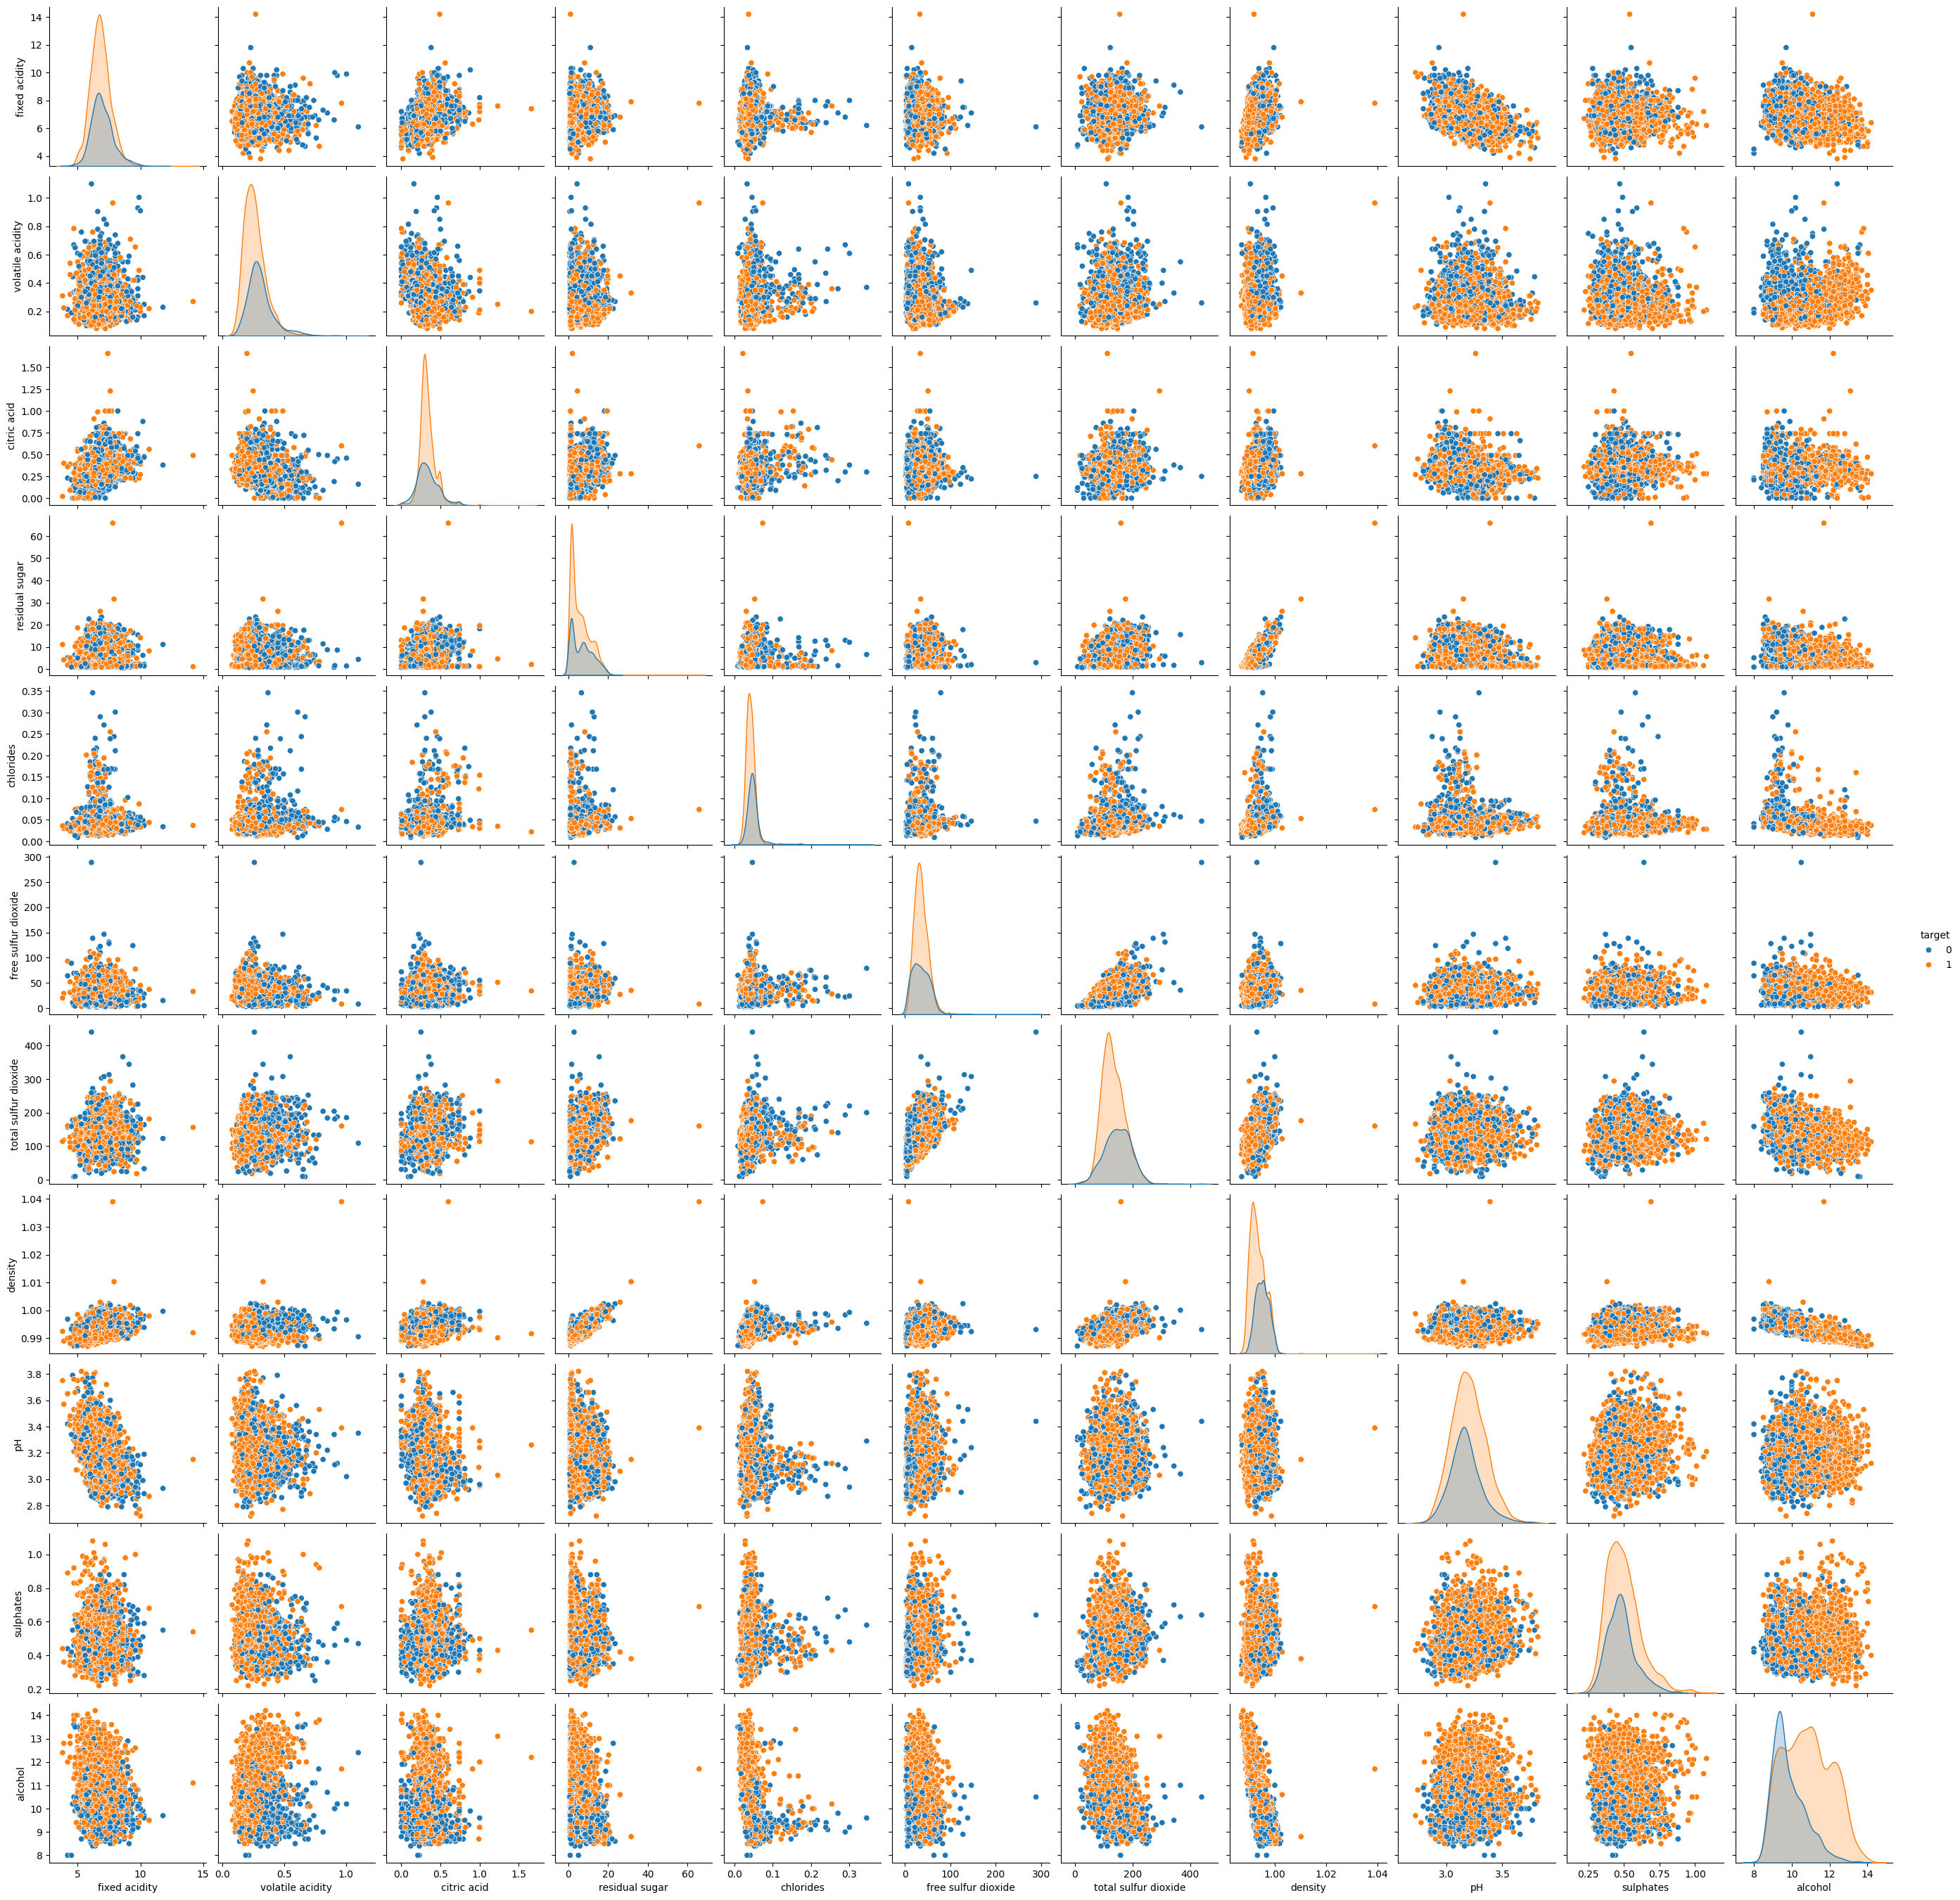

In [154]:
sns.pairplot(df, hue='target')
plt.show()

In [155]:
# Drop redundant features (example: 'total sulfur dioxide')
df.drop(columns=['total sulfur dioxide'], inplace=True)
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'target'],
      dtype='object')


In [156]:
def partition(features, target, t):
    """
    Split the data into training and test sets.

    Parameters:
    features (ndarray): Feature matrix.
    target (ndarray): Target vector.
    t (float): Fraction of data to use for testing.

    Returns:
    tuple: (X_train, X_test, y_train, y_test)
    """
    n_samples = features.shape[0]
    n_test = int(n_samples * t)

    # Split the data
    X_train, X_test = features[:-n_test], features[-n_test:]
    y_train, y_test = target[:-n_test], target[-n_test:]

    return X_train, X_test, y_train, y_test

# Example usage
features = df.drop(columns=['target']).values
target = df['target'].values

X_train, X_test, y_train, y_test = partition(features, target, t=0.2)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3919, 10)
Test set size: (979, 10)


In [157]:
# Initialize and fit the KNN classifier
knn = KNN_Classifier()
knn.fit(X_train, y_train, n_neighbors=5, weights='uniform')

# Make predictions
predictions = knn.predict(X_test)

# Calculate accuracy and F1 score
accuracy = np.mean(predictions == y_test)
f1 = f1_score(y_test, predictions)

print("Accuracy (Unscaled Data):", accuracy)
print("F1 Score (Unscaled Data):", f1)

Accuracy (Unscaled Data): 0.7088866189989785
F1 Score (Unscaled Data): 0.78490566032732


In [158]:
# Standardize the training data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std

# Standardize the test data using the training mean and std
X_test_scaled = (X_test - mean) / std

In [159]:
# Initialize and fit the KNN classifier on standardized data
knn_scaled = KNN_Classifier()
knn_scaled.fit(X_train_scaled, y_train, n_neighbors=5, weights='uniform')

# Make predictions
predictions_scaled = knn_scaled.predict(X_test_scaled)

# Calculate accuracy and F1 score
accuracy_scaled = np.mean(predictions_scaled == y_test)
f1_scaled = f1_score(y_test, predictions_scaled)

print("Accuracy (Scaled Data):", accuracy_scaled)
print("F1 Score (Scaled Data):", f1_scaled)

Accuracy (Scaled Data): 0.7354443309499489
F1 Score (Scaled Data): 0.7993803252790892


In [160]:
print("Comparison:")
print(f"Unscaled Data - Accuracy: {accuracy}, F1 Score: {f1}")
print(f"Scaled Data - Accuracy: {accuracy_scaled}, F1 Score: {f1_scaled}")

Comparison:
Unscaled Data - Accuracy: 0.7088866189989785, F1 Score: 0.78490566032732
Scaled Data - Accuracy: 0.7354443309499489, F1 Score: 0.7993803252790892


In [161]:
# Initialize and fit the KNN classifier with distance weights
knn_distance = KNN_Classifier()
knn_distance.fit(X_train_scaled, y_train, n_neighbors=5, weights='distance')

# Make predictions
predictions_distance = knn_distance.predict(X_test_scaled)

# Calculate accuracy and F1 score
accuracy_distance = np.mean(predictions_distance == y_test)
f1_distance = f1_score(y_test, predictions_distance)

print("Accuracy (Distance Weights):", accuracy_distance)
print("F1 Score (Distance Weights):", f1_distance)

Accuracy (Distance Weights): 0.7926455566905005
F1 Score (Distance Weights): 0.8427575522349305


In [163]:
# Hyperparameter combinations
k_values = [1, 5, 9, 11]
distance_metrics = ['Euclidean', 'Manhattan']
weight_schemes = ['uniform', 'distance']

# Function to evaluate the model
def evaluate_knn(X_train, y_train, X_test, y_test, k, distance, weights):
    """
    Evaluate the KNN model with given hyperparameters.

    Parameters:
    X_train (ndarray): Training feature matrix.
    y_train (ndarray): Training target vector.
    X_test (ndarray): Test feature matrix.
    y_test (ndarray): Test target vector.
    k (int): Number of neighbors.
    distance (str): Distance metric ('Euclidean' or 'Manhattan').
    weights (str): Weighting scheme ('uniform' or 'distance').

    Returns:
    dict: Performance metrics (accuracy, precision, recall, F1 score, confusion matrix).
    """
    # Initialize the KNN classifier
    knn = KNN_Classifier()

    # Fit the model
    knn.fit(X_train, y_train, n_neighbors=k, weights=weights)

    # Make predictions
    predictions = knn.predict(X_test)

    # Compute performance metrics
    acc = np.mean(predictions == y_test)
    prec = precision(y_test, predictions)
    rec = recall(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)

    return {
        'k': k,
        'distance': distance,
        'weights': weights,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'confusion_matrix': cm
    }

# Evaluate all combinations
results = []
for k, distance, weights in product(k_values, distance_metrics, weight_schemes):
    result = evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, k, distance, weights)
    results.append(result)

# Display results
for result in results:
    print(f"k={result['k']}, Distance={result['distance']}, Weights={result['weights']}")
    print(f"Accuracy: {result['accuracy']:.4f}, Precision: {result['precision']:.4f}, Recall: {result['recall']:.4f}, F1 Score: {result['f1_score']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("-" * 50)

k=1, Distance=Euclidean, Weights=uniform
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Euclidean, Weights=distance
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Manhattan, Weights=uniform
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Manhattan, Weights=distance
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=5, Distance=Euclidean, Weights=uniform
Accuracy: 0.7354, Precision: 0.7878, Recall: 0.8113, F1 Score: 0.7994
Confusion Matrix:
[[204 139]
 [120 516]]
----------------------------------

In [ ]:
'''
k=1, Distance=Euclidean, Weights=uniform
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Euclidean, Weights=distance
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Manhattan, Weights=uniform
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=1, Distance=Manhattan, Weights=distance
Accuracy: 0.7783, Precision: 0.8341, Recall: 0.8223, F1 Score: 0.8282
Confusion Matrix:
[[239 104]
 [113 523]]
--------------------------------------------------
k=5, Distance=Euclidean, Weights=uniform
Accuracy: 0.7354, Precision: 0.7878, Recall: 0.8113, F1 Score: 0.7994
Confusion Matrix:
[[204 139]
 [120 516]]
--------------------------------------------------
k=5, Distance=Euclidean, Weights=distance
Accuracy: 0.7926, Precision: 0.8305, Recall: 0.8553, F1 Score: 0.8428
Confusion Matrix:
[[232 111]
 [ 92 544]]
--------------------------------------------------
k=5, Distance=Manhattan, Weights=uniform
Accuracy: 0.7354, Precision: 0.7878, Recall: 0.8113, F1 Score: 0.7994
Confusion Matrix:
[[204 139]
 [120 516]]
--------------------------------------------------
k=5, Distance=Manhattan, Weights=distance
Accuracy: 0.7926, Precision: 0.8305, Recall: 0.8553, F1 Score: 0.8428
Confusion Matrix:
[[232 111]
 [ 92 544]]
--------------------------------------------------
k=9, Distance=Euclidean, Weights=uniform
Accuracy: 0.7426, Precision: 0.7815, Recall: 0.8381, F1 Score: 0.8088
Confusion Matrix:
[[194 149]
 [103 533]]
--------------------------------------------------
k=9, Distance=Euclidean, Weights=distance
Accuracy: 0.8029, Precision: 0.8291, Recall: 0.8774, F1 Score: 0.8526
Confusion Matrix:
[[228 115]
 [ 78 558]]
--------------------------------------------------
k=9, Distance=Manhattan, Weights=uniform
Accuracy: 0.7426, Precision: 0.7815, Recall: 0.8381, F1 Score: 0.8088
Confusion Matrix:
[[194 149]
 [103 533]]
--------------------------------------------------
k=9, Distance=Manhattan, Weights=distance
Accuracy: 0.8029, Precision: 0.8291, Recall: 0.8774, F1 Score: 0.8526
Confusion Matrix:
[[228 115]
 [ 78 558]]
--------------------------------------------------
k=11, Distance=Euclidean, Weights=uniform
Accuracy: 0.7395, Precision: 0.7781, Recall: 0.8381, F1 Score: 0.8070
Confusion Matrix:
[[191 152]
 [103 533]]
--------------------------------------------------
k=11, Distance=Euclidean, Weights=distance
Accuracy: 0.8039, Precision: 0.8265, Recall: 0.8836, F1 Score: 0.8541
Confusion Matrix:
[[225 118]
 [ 74 562]]
--------------------------------------------------
k=11, Distance=Manhattan, Weights=uniform
Accuracy: 0.7395, Precision: 0.7781, Recall: 0.8381, F1 Score: 0.8070
Confusion Matrix:
[[191 152]
 [103 533]]
--------------------------------------------------
k=11, Distance=Manhattan, Weights=distance
Accuracy: 0.8039, Precision: 0.8265, Recall: 0.8836, F1 Score: 0.8541
Confusion Matrix:
[[225 118]
 [ 74 562]]
--------------------------------------------------
'''

The best model is the KNN classifier with k=11, Distance=Manhattan, and Weights=distance. This model achieves the highest accuracy (0.8039), recall (0.8836), and F1 score (0.8541), indicating strong overall performance. The high recall means it excels at identifying true positives (good wines), which is crucial for minimizing false negatives. Additionally, the F1 score reflects a good balance between precision and recall, ensuring reliable predictions. The use of distance weighting further enhances performance by giving more importance to closer neighbors, while the larger k value (k=11) helps smooth out noise and improve generalization. Overall, this model strikes the best balance between accuracy, precision, and recall, making it the optimal choice for this dataset.






